In [110]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

## Logistic Regression.

In [111]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [129]:
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=10, regularization=None):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.regularization = regularization
        self.weights = None
        self.bias = None
        self.training_accuracies = []
        self.validation_accuracies = []

    def fit(self, X, y, X_val, y_val):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            if self.regularization is not None:
                dw += (self.regularization / n_samples) * np.sign(self.weights)  # L1 reg

            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            accuracy = np.mean((y_predicted >= 0.5) == y)
            self.training_accuracies.append(accuracy)

            linear_model_val = np.dot(X_val, self.weights) + self.bias
            y_pred_val = sigmoid(linear_model_val)

            val_accuracy = np.mean((y_pred_val >= 0.5) == y_val)
            self.validation_accuracies.append(val_accuracy)

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_model)

    def predict(self, X):
        proba = self.predict_proba(X)
        return [1 if p >= 0.5 else 0 for p in proba]

    def score(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)

    def plot_learning_curve(self):
        plt.figure(figsize=(8, 6))
        plt.plot(range(1, len(self.training_accuracies) + 1), self.training_accuracies, label='Training Accuracy', color='blue')
        plt.plot(range(1, len(self.validation_accuracies) + 1), self.validation_accuracies, label='Validation Accuracy', color='orange', linestyle='--')
        plt.xlabel('Iterations', fontsize=12)
        plt.ylabel('Accuracy', fontsize=12)
        plt.title('Learning Curve', fontsize=14)
        plt.legend(loc='lower right', fontsize=10)
        plt.grid(visible=True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.savefig('learning_curve_heart.pdf')
        plt.show()

## Exploratory Data Analysis (EDA). 

In [113]:
heart = pd.read_csv('heart.csv')

In [114]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [115]:
heart.shape

(1025, 14)

In [116]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [117]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [118]:
class_1, class_0 = heart['target'].value_counts()

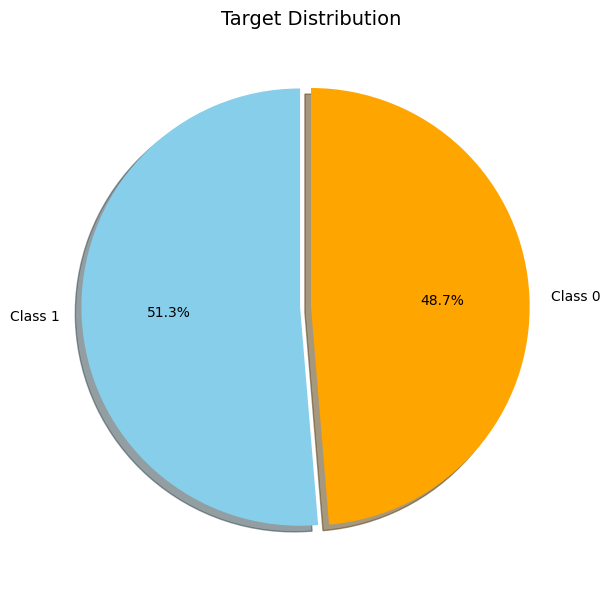

In [120]:
target_counts = [class_1, class_0]
target_labels = ['Class 1', 'Class 0']

plt.figure(figsize=(8, 6))
plt.pie(
    target_counts, 
    labels=target_labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['skyblue', 'orange'], 
    explode=[0.05, 0], 
    shadow=True
)
plt.title("Target Distribution", fontsize=14)
plt.tight_layout()
plt.savefig("target_distribution.pdf")
plt.show()

### Analyze the correlation between features and target using a heatmap.

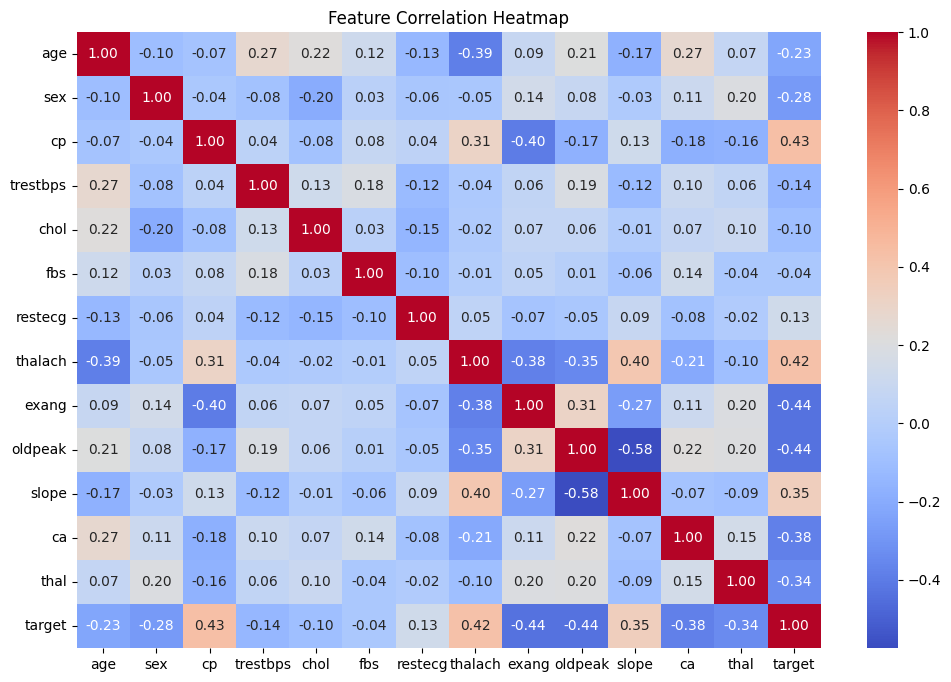

In [122]:
plt.figure(figsize=(12, 8))
sns.heatmap(heart.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.savefig("correlation_heatmap_heart.pdf")
plt.show()

### Create different Numpy arrays for features and target.

In [123]:
target = heart['target'].values

In [124]:
target.shape

(1025,)

In [125]:
heart.drop(['target'], axis = 1, inplace = True)

In [126]:
heart.shape

(1025, 13)

In [127]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


### Compute the mutual information between features and target.


Feature Importance (Mutual Information):
chol        0.258855
thalach     0.185132
thal        0.148165
cp          0.132744
ca          0.132513
exang       0.128640
oldpeak     0.126074
trestbps    0.081402
slope       0.071366
age         0.060174
fbs         0.029318
sex         0.025758
restecg     0.014841
dtype: float64


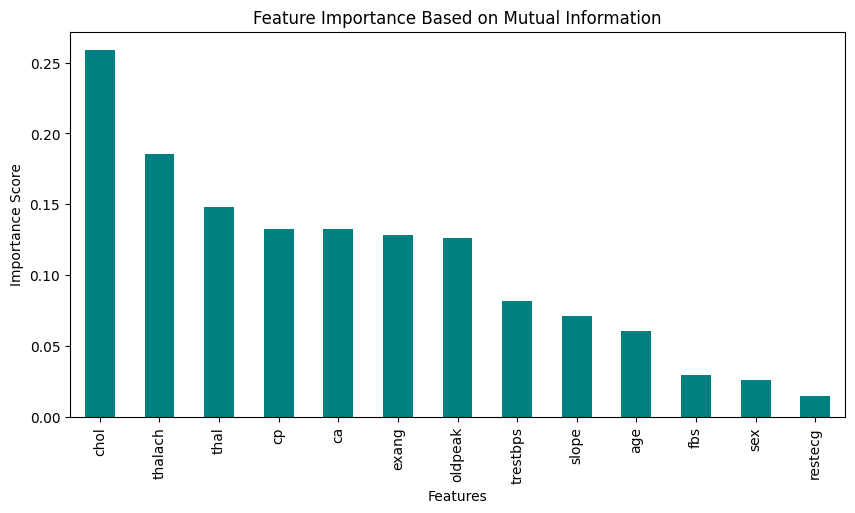

In [128]:
mi = mutual_info_classif(heart, target)
feature_importance = pd.Series(mi, index=heart.columns).sort_values(ascending=False)

print("\nFeature Importance (Mutual Information):")
print(feature_importance)

plt.figure(figsize=(10, 5))
feature_importance.plot(kind='bar', color='teal')
plt.title('Feature Importance Based on Mutual Information')
plt.xlabel('Features') 
plt.ylabel('Importance Score')
plt.savefig('importance_score.pdf')
plt.show()

### Plot the features distribution for both classes to decide the most relevant features in the dataset. 

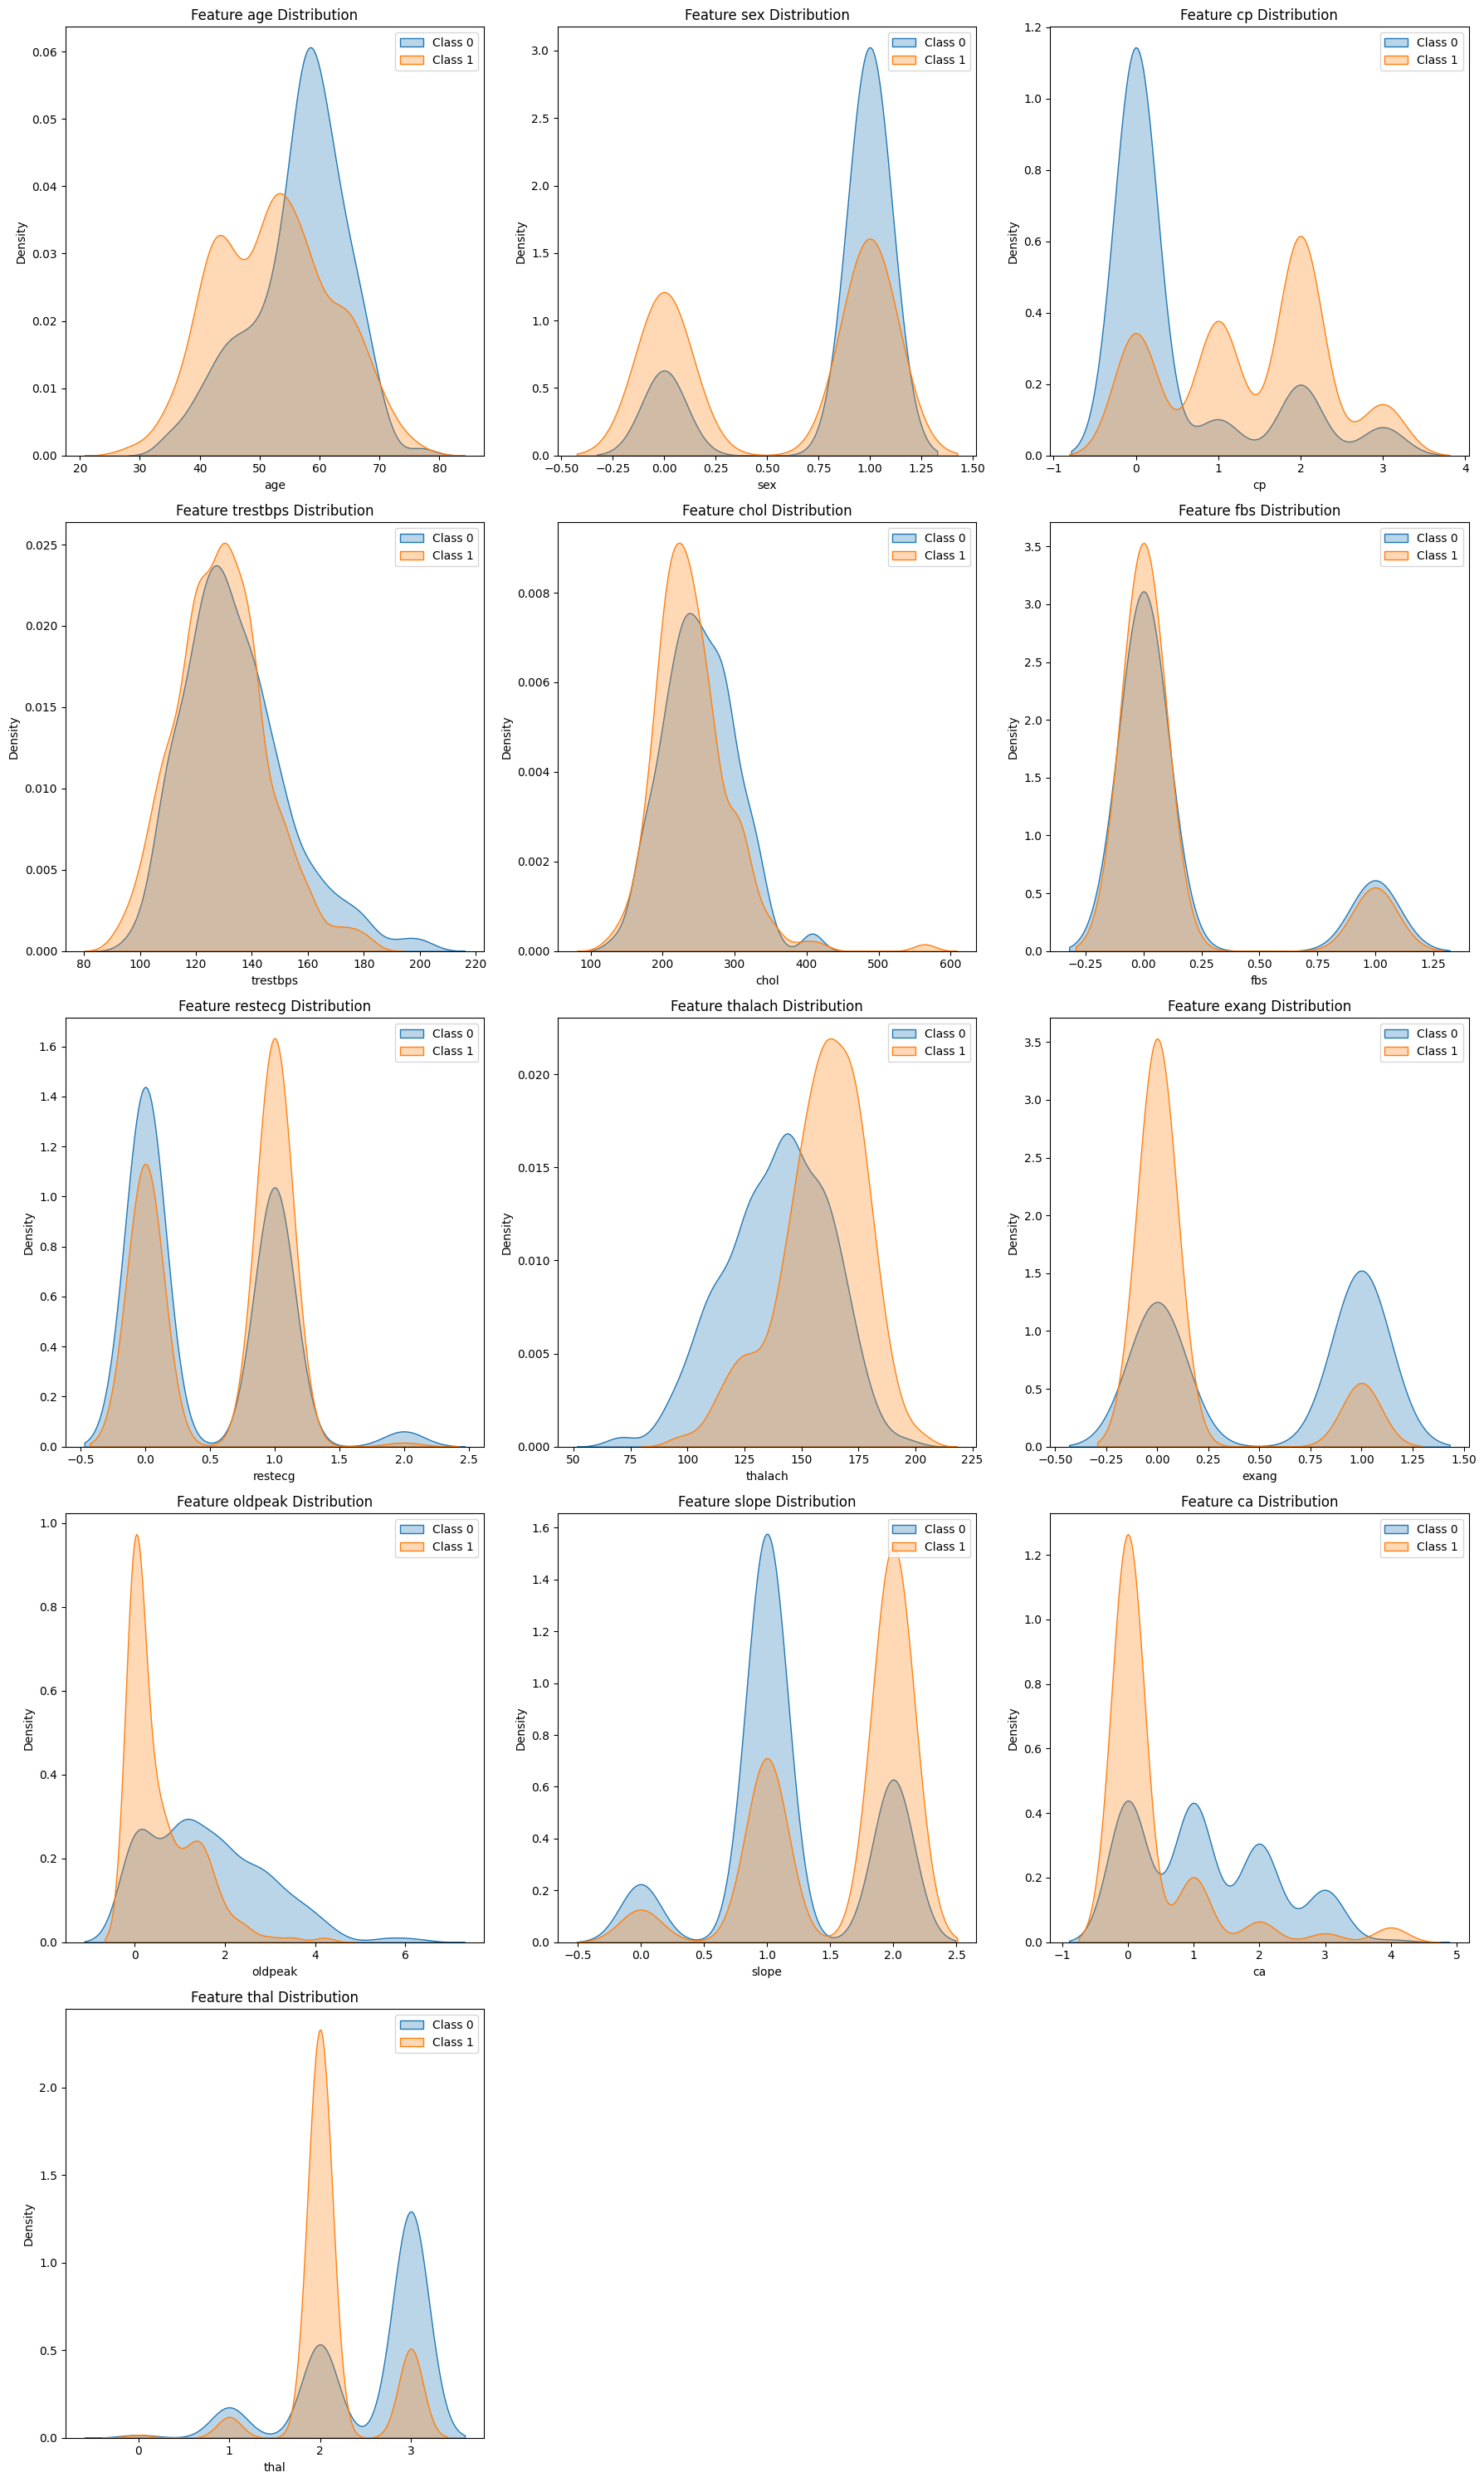

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

n_cols = 3
n_features = len(heart.columns)
n_rows = (n_features // n_cols) + (n_features % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 6))

axes = axes.flatten()

for idx, feature_idx in enumerate(heart.columns):
    ax = axes[idx]
    sns.kdeplot(heart.loc[target == 0, feature_idx], label='Class 0', fill=True, alpha=0.3, ax=ax)
    sns.kdeplot(heart.loc[target == 1, feature_idx], label='Class 1', fill=True, alpha=0.3, ax=ax)
    ax.set_title(f"Feature {feature_idx} Distribution")
    ax.legend()

for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.savefig("feature_distributions.pdf")
plt.show()

### Experiment with different training sets containing various features

#### First subset containing the most 5 relevant features.

In [130]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_1 = scaler.fit_transform(heart[['chol', 'cp', 'thalach', 'oldpeak', 'thal']])

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, target, test_size=0.2, random_state=42, shuffle=True)

model_1 = MyLogisticRegression(learning_rate=0.005, iterations=10)
model_1.fit(X_train_1, y_train_1, X_test_1, y_test_1)

train_accuracy_1 = model_1.score(X_train_1, y_train_1)
test_accuracy_1 = model_1.score(X_test_1, y_test_1)

print(f"Training accuracy for the first subset is {train_accuracy_1}.")
print(f"Testing accuracy for the first subset is {test_accuracy_1}.")

Training accuracy for the first subset is 0.802439024390244.
Testing accuracy for the first subset is 0.775609756097561.


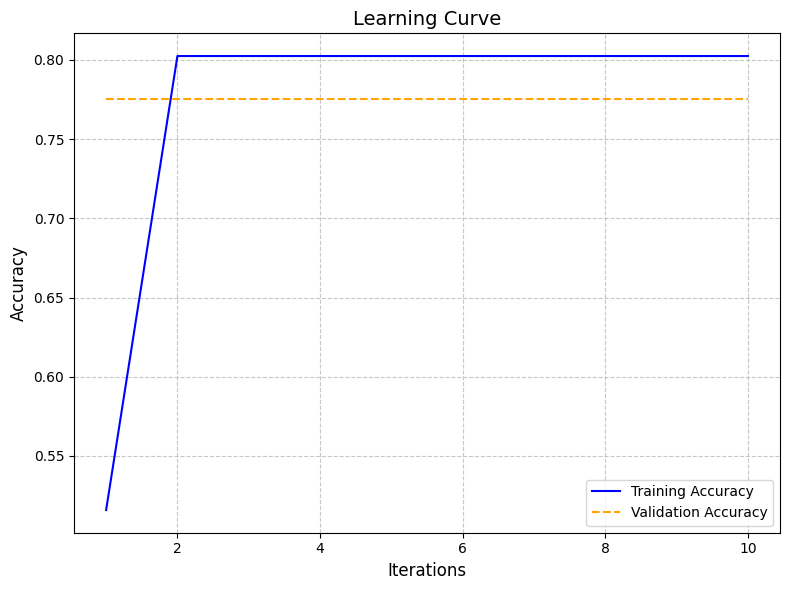

In [131]:
model_1.plot_learning_curve()

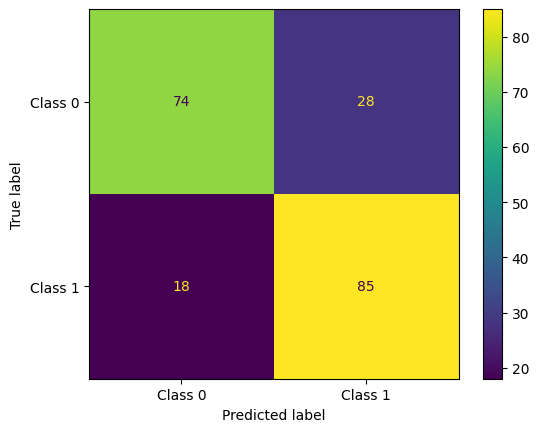

In [132]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_1, model_1.predict(X_test_1))
ConfusionMatrixDisplay(cm, display_labels=['Class 0', 'Class 1']).plot()
plt.savefig("conf_mat_h_most_rel_feat.pdf")
plt.show()

In [133]:
from sklearn.metrics import classification_report

y_pred_1 = model_1.predict(X_test_1)

print("\nClassification Report:")
print(classification_report(y_test_1, y_pred_1, target_names=["Class 0", "Class 1"]))


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.80      0.73      0.76       102
     Class 1       0.75      0.83      0.79       103

    accuracy                           0.78       205
   macro avg       0.78      0.78      0.77       205
weighted avg       0.78      0.78      0.78       205



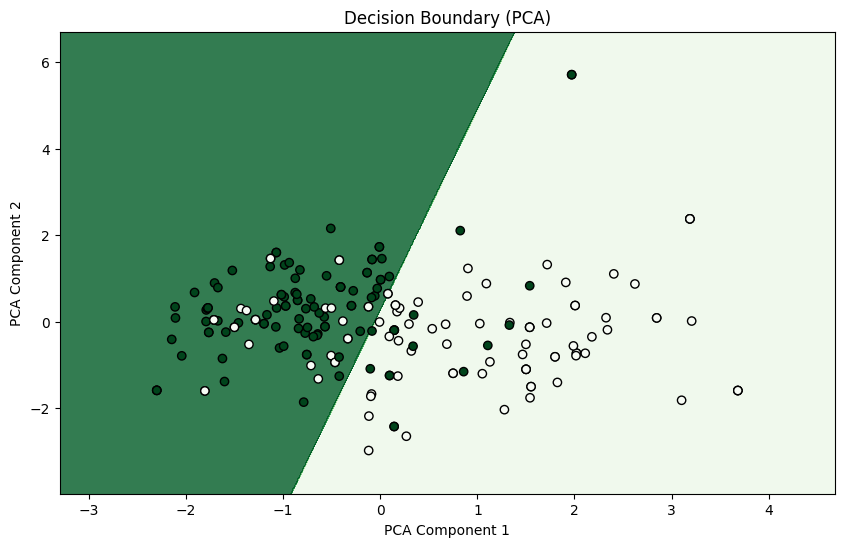

In [134]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_1)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = model_1.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = np.array(Z).reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='Greens')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_test_1, edgecolors='k', cmap='Greens')
plt.title("Decision Boundary (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.savefig("pca_h_1.pdf")
plt.show()

#### Second subset containing all the features.

In [135]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_2 = scaler.fit_transform(heart[['chol', 'cp', 'thalach', 'oldpeak', 'thal', 'ca', 'exang', 'trestbps', 'slope', 'age', 'sex', 'restecg', 'fbs']])

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, target, test_size=0.2, random_state=42, shuffle=True)

model_2 = MyLogisticRegression(learning_rate=0.005, iterations=10)
model_2.fit(X_train_2, y_train_2, X_test_2, y_test_2)

train_accuracy_2 = model_2.score(X_train_2, y_train_2)
test_accuracy_2 = model_2.score(X_test_2, y_test_2)

print(f"Training accuracy for the second subset is {train_accuracy_2}.")
print(f"Testing accuracy for the second subset is {test_accuracy_2}.")

Training accuracy for the second subset is 0.8329268292682926.
Testing accuracy for the second subset is 0.7804878048780488.


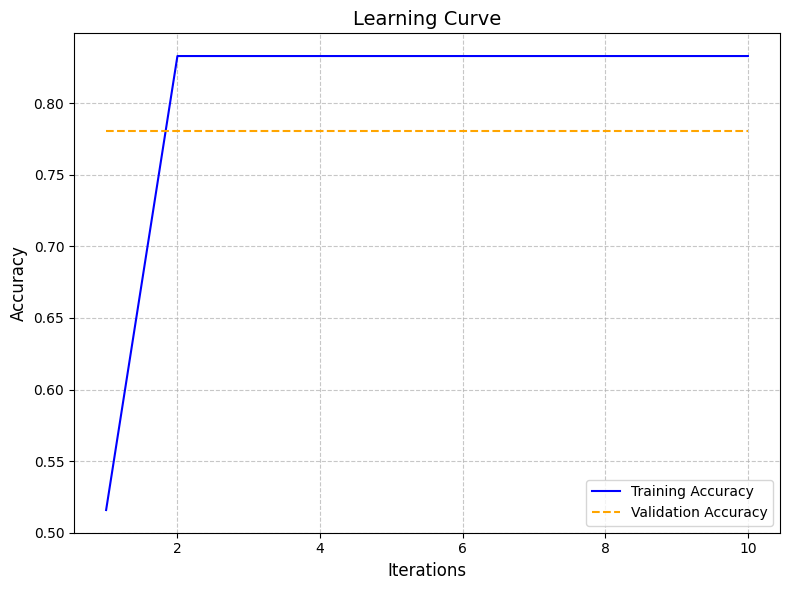

In [136]:
model_2.plot_learning_curve()

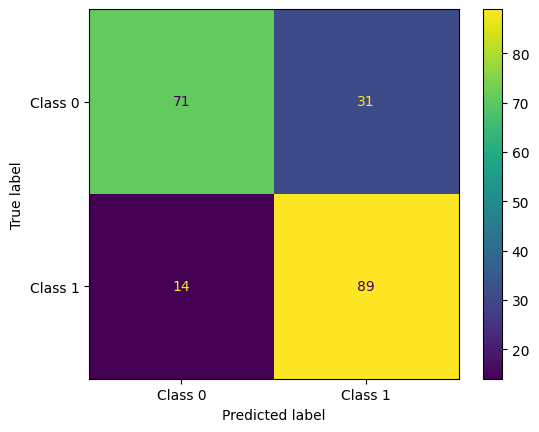

In [137]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_2, model_2.predict(X_test_2))
ConfusionMatrixDisplay(cm, display_labels=['Class 0', 'Class 1']).plot()
plt.savefig("conf_mat_h_all.pdf")
plt.show()

In [138]:
from sklearn.metrics import classification_report

y_pred_2 = model_2.predict(X_test_2)

print("\nClassification Report:")
print(classification_report(y_test_2, y_pred_2, target_names=["Class 0", "Class 1"]))


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.84      0.70      0.76       102
     Class 1       0.74      0.86      0.80       103

    accuracy                           0.78       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.78      0.78       205



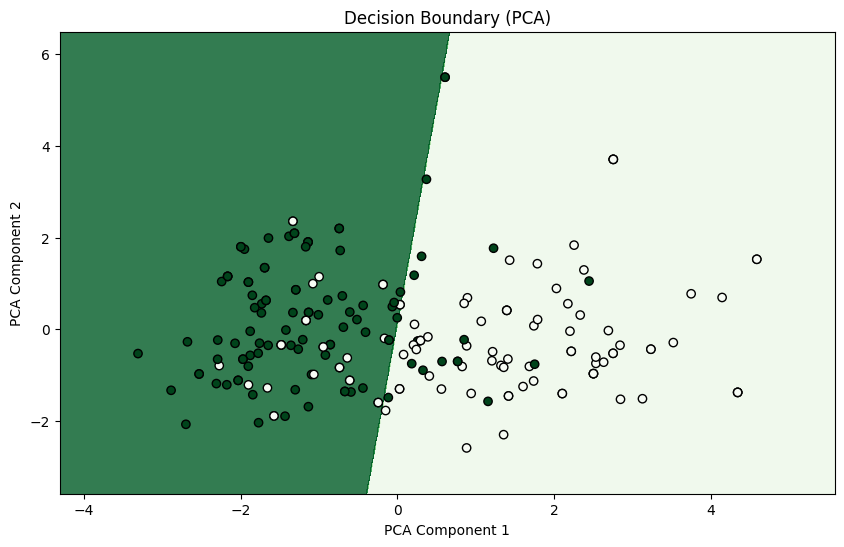

In [139]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_2)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = model_2.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = np.array(Z).reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='Greens')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_test_2, edgecolors='k', cmap='Greens')
plt.title("Decision Boundary (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.savefig("pca_h_2.pdf")
plt.show()

#### Third subset containing top 5 features, excluding _chol_.

In [140]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_3 = scaler.fit_transform(heart[['cp', 'thalach', 'oldpeak', 'thal', 'ca']])

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, target, test_size=0.2, random_state=42, shuffle=True)

model_3 = MyLogisticRegression(learning_rate=0.005, iterations=10)
model_3.fit(X_train_3, y_train_3, X_test_3, y_test_3)

train_accuracy_3 = model_3.score(X_train_3, y_train_3)
test_accuracy_3 = model_3.score(X_test_3, y_test_3)

print(f"Training accuracy for the third subset is {train_accuracy_3}.")
print(f"Testing accuracy for the third subset is {test_accuracy_3}.")

Training accuracy for the third subset is 0.8426829268292683.
Testing accuracy for the third subset is 0.775609756097561.


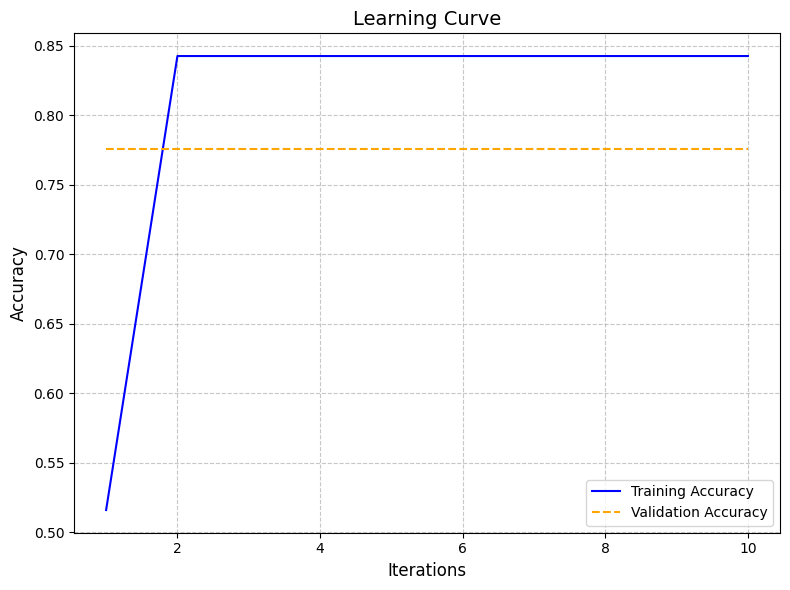

In [141]:
model_3.plot_learning_curve()

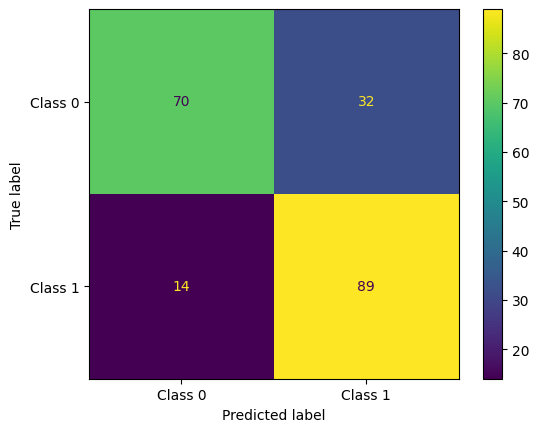

In [142]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_3, model_3.predict(X_test_3))
ConfusionMatrixDisplay(cm, display_labels=['Class 0', 'Class 1']).plot()
plt.savefig("conf_mat_h_top_5_without.pdf")
plt.show()

In [143]:
from sklearn.metrics import classification_report

y_pred_3 = model_3.predict(X_test_3)

print("\nClassification Report:")
print(classification_report(y_test_3, y_pred_3, target_names=["Class 0", "Class 1"]))


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.83      0.69      0.75       102
     Class 1       0.74      0.86      0.79       103

    accuracy                           0.78       205
   macro avg       0.78      0.78      0.77       205
weighted avg       0.78      0.78      0.77       205



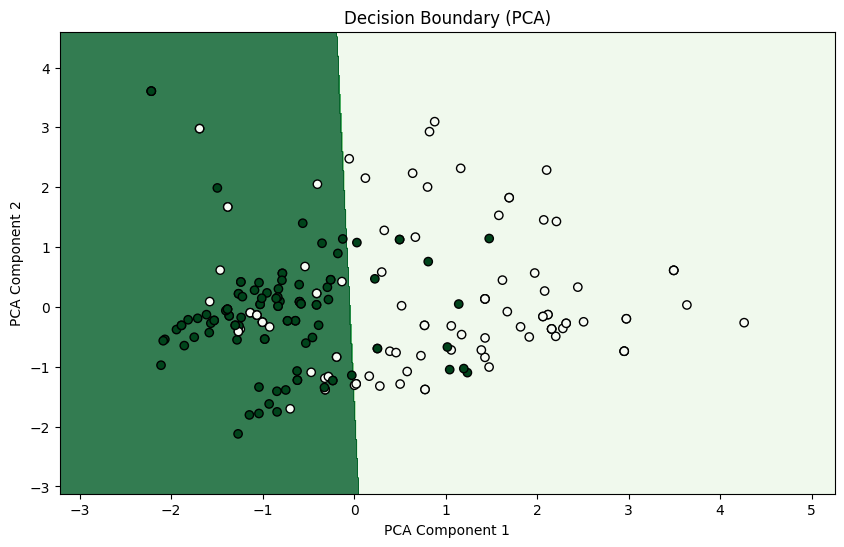

In [144]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_3)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = model_3.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = np.array(Z).reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='Greens')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_test_3, edgecolors='k', cmap='Greens')
plt.title("Decision Boundary (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.savefig("pca_h_3.pdf")
plt.show()

#### Fourth subset containing features that describe patient demographics and heart health.

In [145]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_4 = scaler.fit_transform(heart[['age', 'sex', 'chol', 'trestbps', 'thalach']])

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, target, test_size=0.2, random_state=42, shuffle=True)

model_4 = MyLogisticRegression(learning_rate=0.005, iterations=10)
model_4.fit(X_train_4, y_train_4, X_test_4, y_test_4)

train_accuracy_4 = model_4.score(X_train_4, y_train_4)
test_accuracy_4 = model_4.score(X_test_4, y_test_4)

print(f"Training accuracy for the fourth subset is {train_accuracy_4}.")
print(f"Testing accuracy for the fourth subset is {test_accuracy_4}.")

Training accuracy for the fourth subset is 0.7036585365853658.
Testing accuracy for the fourth subset is 0.6878048780487804.


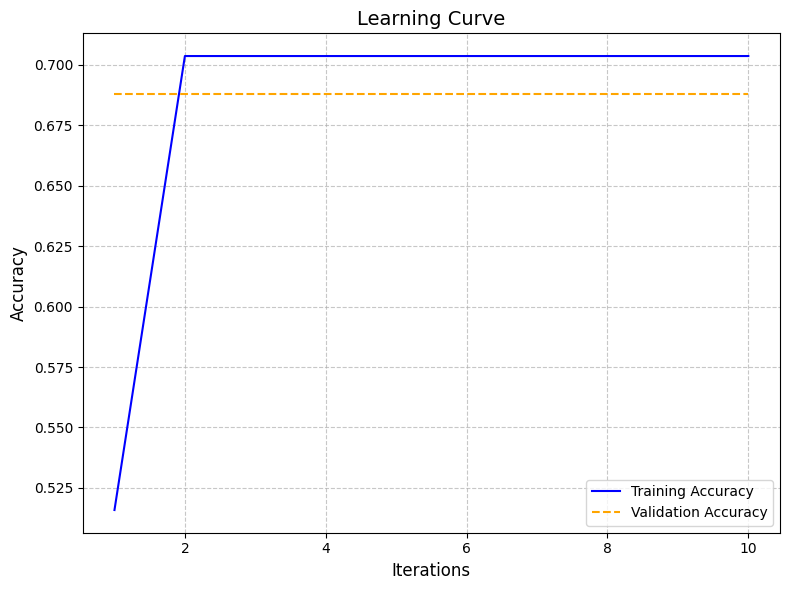

In [146]:
model_4.plot_learning_curve()

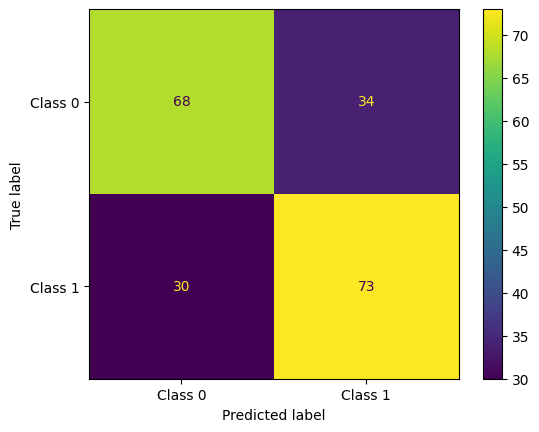

In [147]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_4, model_4.predict(X_test_4))
ConfusionMatrixDisplay(cm, display_labels=['Class 0', 'Class 1']).plot()
plt.savefig("conf_mat_h_4.pdf")
plt.show()

In [148]:
from sklearn.metrics import classification_report

y_pred_4 = model_4.predict(X_test_4)

print("\nClassification Report:")
print(classification_report(y_test_4, y_pred_4, target_names=["Class 0", "Class 1"]))


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.69      0.67      0.68       102
     Class 1       0.68      0.71      0.70       103

    accuracy                           0.69       205
   macro avg       0.69      0.69      0.69       205
weighted avg       0.69      0.69      0.69       205



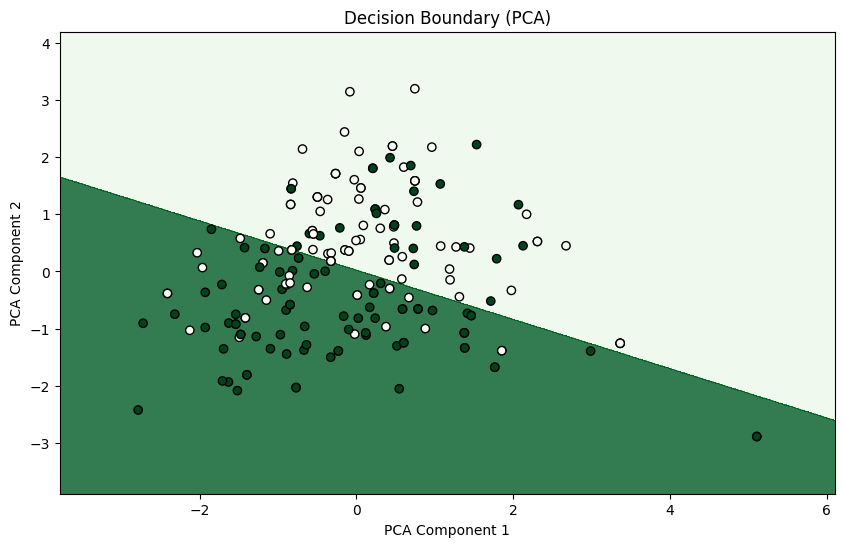

In [149]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_4)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = model_4.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = np.array(Z).reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='Greens')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_test_4, edgecolors='k', cmap='Greens')
plt.title("Decision Boundary (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.savefig("pca_h_4.pdf")
plt.show()

#### Fifth subset containing features with mid-range importance.

In [150]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_5 = scaler.fit_transform(heart[['thalach', 'oldpeak', 'thal', 'ca', 'exang', 'trestbps']])

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, target, test_size=0.2, random_state=42, shuffle=True)

model_5 = MyLogisticRegression(learning_rate=0.005, iterations=10)
model_5.fit(X_train_5, y_train_5, X_test_5, y_test_5)

train_accuracy_5 = model_5.score(X_train_5, y_train_5)
test_accuracy_5 = model_5.score(X_test_5, y_test_5)

print(f"Training accuracy for the fifth subset is {train_accuracy_5}.")
print(f"Testing accuracy for the fifth subset is {test_accuracy_5}.")

Training accuracy for the fifth subset is 0.823170731707317.
Testing accuracy for the fifth subset is 0.7609756097560976.


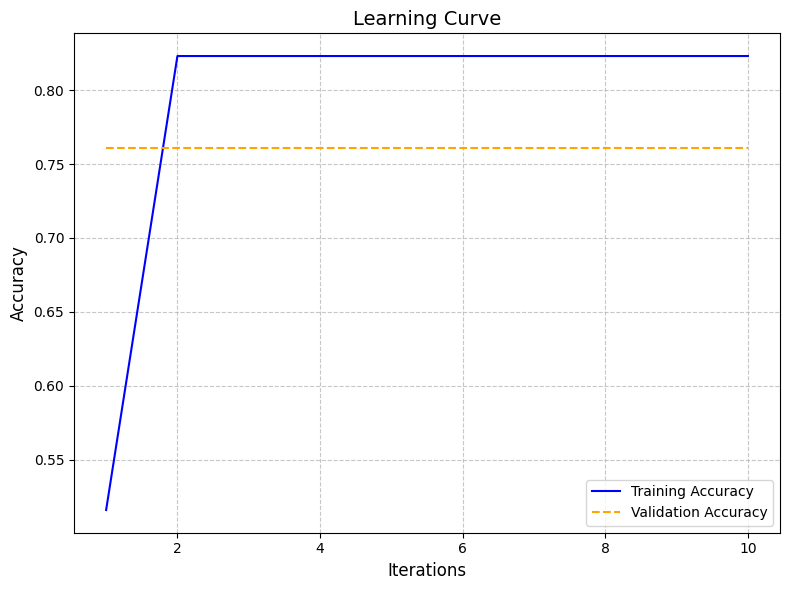

In [151]:
model_5.plot_learning_curve()

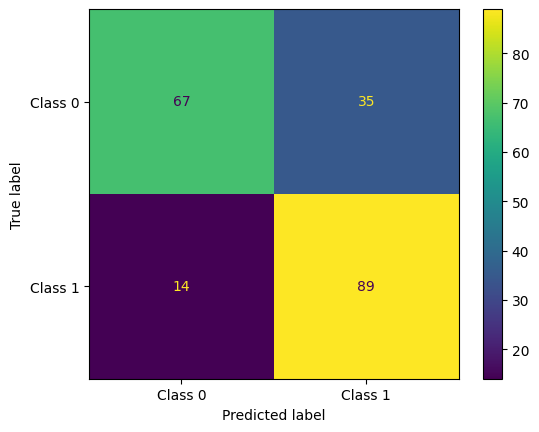

In [160]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_5, model_5.predict(X_test_5))
ConfusionMatrixDisplay(cm, display_labels=['Class 0', 'Class 1']).plot()
plt.savefig("conf_h_5.pdf")
plt.show()

In [153]:
from sklearn.metrics import classification_report

y_pred_5 = model_5.predict(X_test_5)

print("\nClassification Report:")
print(classification_report(y_test_5, y_pred_5, target_names=["Class 0", "Class 1"]))


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.83      0.66      0.73       102
     Class 1       0.72      0.86      0.78       103

    accuracy                           0.76       205
   macro avg       0.77      0.76      0.76       205
weighted avg       0.77      0.76      0.76       205



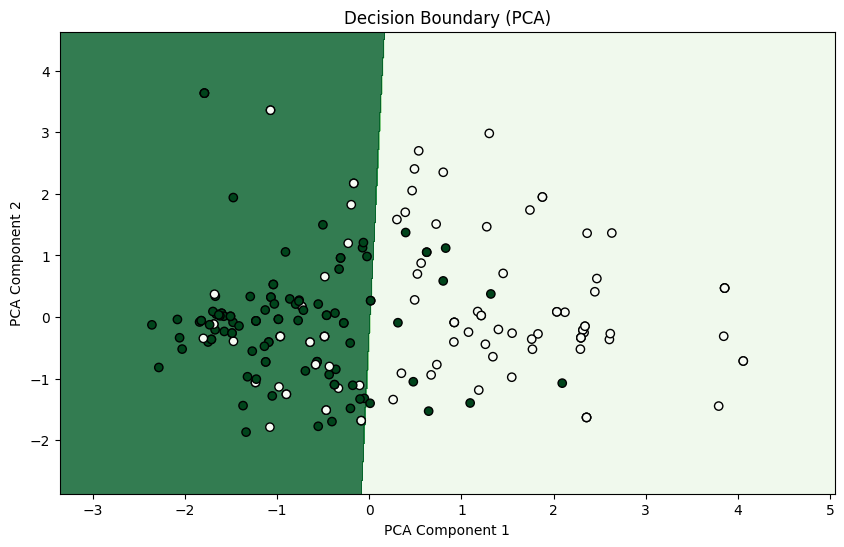

In [154]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_5)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = model_5.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = np.array(Z).reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='Greens')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_test_5, edgecolors='k', cmap='Greens')
plt.title("Decision Boundary (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.savefig("pca_h_5.pdf")
plt.show()

#### Sixth subset containing all the features excluding the ones with the lowest importance feature.

In [155]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_6 = scaler.fit_transform(heart[['chol', 'cp', 'thalach', 'oldpeak', 'thal', 'ca', 'exang', 'trestbps', 'slope', 'age']])

X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_6, target, test_size=0.2, random_state=42, shuffle=True)

model_6 = MyLogisticRegression(learning_rate=0.005, iterations=10)
model_6.fit(X_train_6, y_train_6, X_test_6, y_test_6)

train_accuracy_6 = model_6.score(X_train_6, y_train_6)
test_accuracy_6 = model_6.score(X_test_6, y_test_6)

print(f"Training accuracy for the sixth subset is {train_accuracy_6}.")
print(f"Testing accuracy for the sixth subset is {test_accuracy_6}.")

Training accuracy for the sixth subset is 0.8146341463414634.
Testing accuracy for the sixth subset is 0.751219512195122.


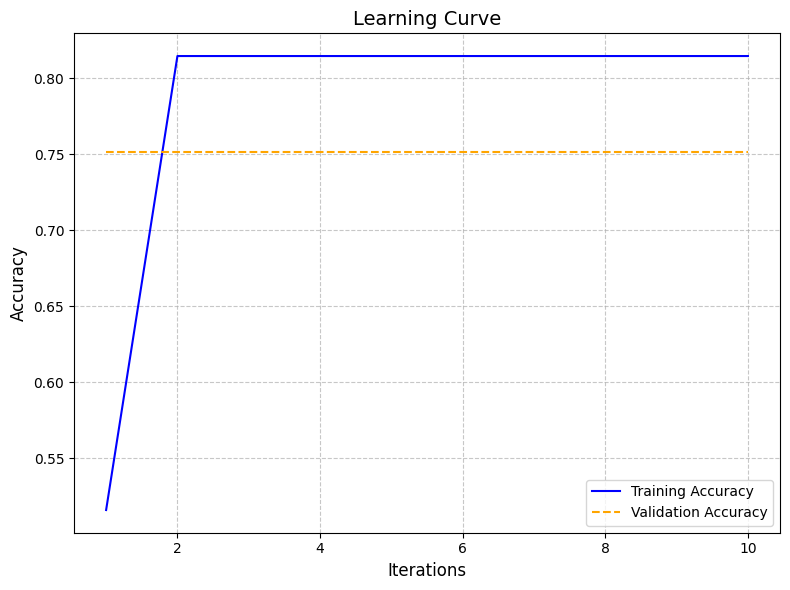

In [156]:
model_6.plot_learning_curve()

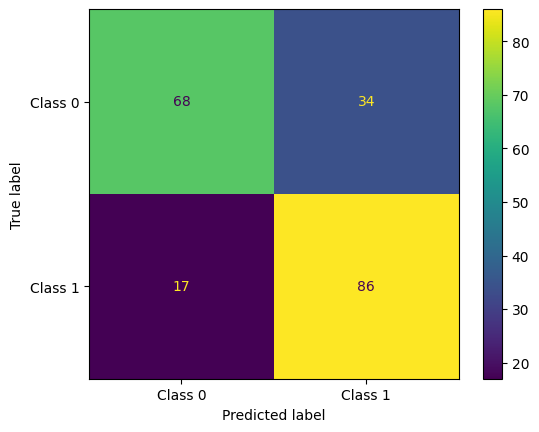

In [157]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_6, model_6.predict(X_test_6))
ConfusionMatrixDisplay(cm, display_labels=['Class 0', 'Class 1']).plot()
plt.savefig("conf_mat_6.pdf")
plt.show()

In [158]:
from sklearn.metrics import classification_report

y_pred_6 = model_6.predict(X_test_6)

print("\nClassification Report:")
print(classification_report(y_test_6, y_pred_6, target_names=["Class 0", "Class 1"]))


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.80      0.67      0.73       102
     Class 1       0.72      0.83      0.77       103

    accuracy                           0.75       205
   macro avg       0.76      0.75      0.75       205
weighted avg       0.76      0.75      0.75       205



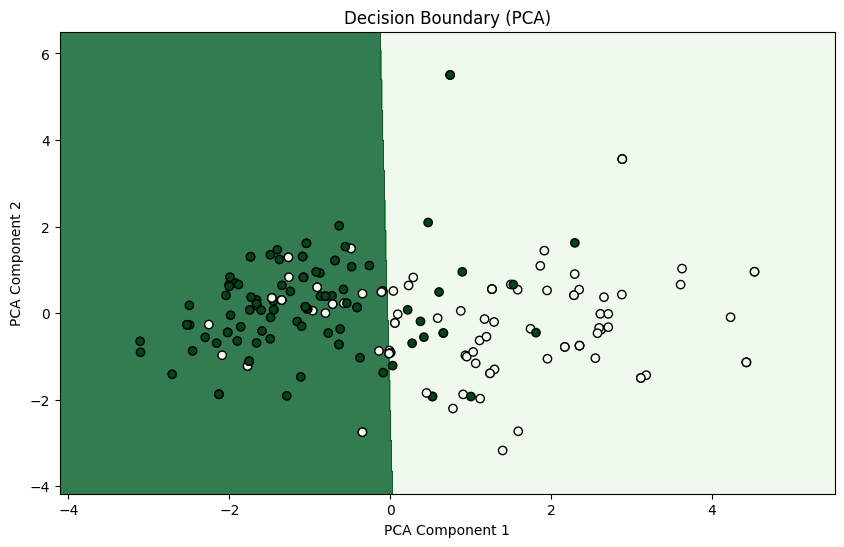

In [159]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_6)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = model_6.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = np.array(Z).reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='Greens')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_test_6, edgecolors='k', cmap='Greens')
plt.title("Decision Boundary (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.savefig("pca_h_6.pdf")
plt.show()